In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import math
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
start = dt.datetime.today()-dt.timedelta(700)
end = dt.datetime.today()
ticker = 'NVDA'

In [4]:
df = yf.download(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-20,102.742500,105.312500,101.567497,105.107498,104.913292,28485200
2020-07-21,105.129997,105.599998,102.867500,103.285004,103.094185,27703600
2020-07-22,103.675003,106.025002,102.915001,104.387497,104.194641,36729200
2020-07-23,104.500000,105.470001,100.312500,101.297501,101.110336,41166000
2020-07-24,98.750000,103.647499,97.769997,101.945000,101.756645,47329200


In [5]:
def psar(df, iaf = 0.02, maxaf = 0.2):
    length = len(df)
    dates = list(df.index)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    psar = close[0:len(close)]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = low[0]
    hp = high[0]
    lp = low[0]

    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if low[i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = low[i]
                af = iaf
        else:
            if high[i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = high[i]
                af = iaf
        if not reverse:
            if bull:
                if high[i] > hp:
                    hp = high[i]
                    af = min(af + iaf, maxaf)
                if low[i - 1] < psar[i]:
                    psar[i] = low[i - 1]
                if low[i - 2] < psar[i]:
                    psar[i] = low[i - 2]
            else:
                if low[i] < lp:
                    lp = low[i]
                    af = min(af + iaf, maxaf)
                if high[i - 1] > psar[i]:
                    psar[i] = high[i - 1]
                if high[i - 2] > psar[i]:
                    psar[i] = high[i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
    return {"dates":dates, "high":high, "low":low, "close":close, "psar":psar, "psarbear":psarbear, "psarbull":psarbull}

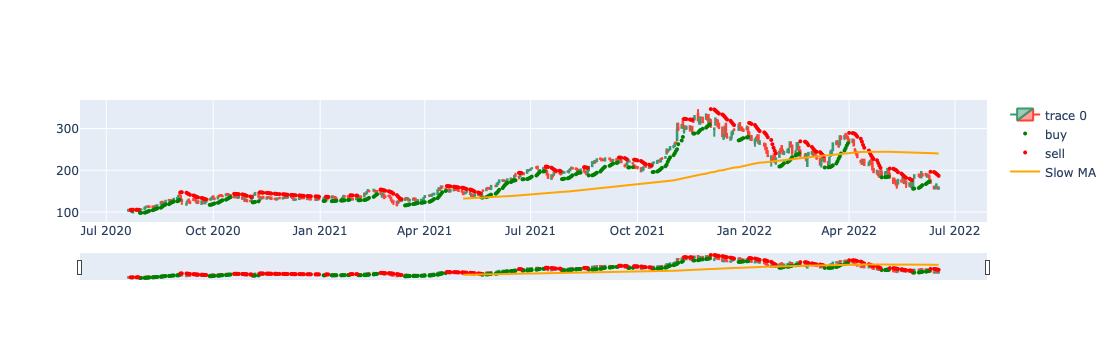

In [7]:

import panel as pn
from panel.interact import interact
pn.extension("plotly")

if __name__ == "__main__":
    import sys
    import os
    
    startidx = 0
    endidx = len(df)
    
    result = psar(df)
    dates = result['dates'][startidx:endidx]
    close = result['close'][startidx:endidx]
    psarbear = result['psarbear'][startidx:endidx]
    psarbull = result['psarbull'][startidx:endidx]
    df['Slow MA'] = df['Adj Close'].rolling(200).mean()
#     df['Fast MA'] = df['Adj Close'].rolling(9).mean()
    
    # plt.title('PSAR (Parabolic Stop & Reverse)')
    # plt.plot(dates, close, label = ticker)
    # plt.plot(dates, psarbull, label = 'Buy', color = 'green')
    # plt.plot(dates, psarbear, label = 'Sell', color = 'red' )
    # plt.plot(df['200 MA'], label = '200 Day MA')
    # plt.legend()
    # plt.grid()
    # plt.show()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.add_trace(go.Scatter(x=dates, y=psarbull, name='buy',mode = 'markers',
                         marker = dict(color='green', size=4)))

fig.add_trace(go.Scatter(x=dates, y=psarbear, name='sell', mode = 'markers',
                         marker = dict(color='red', size=4)))

fig.add_trace(go.Scatter(x=df.index, y=df['Slow MA'], name='Slow MA',
                         line = dict(color='orange', width=2)))

# fig.add_trace(go.Scatter(x=dfp.index, y=dfp['Fast MA'], name='fast MA',
#                          line = dict(color='Blue', width=2)))

#fig.show()
#sto_ind = pn.Column(fig)

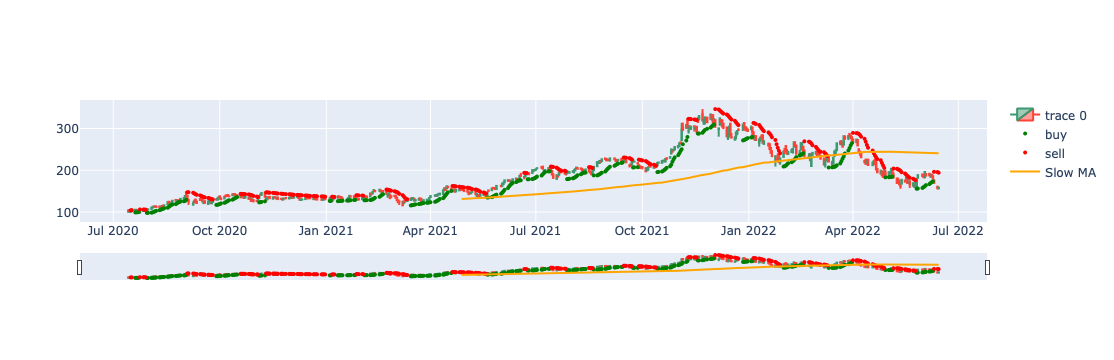

In [8]:
startidx = 0
endidx = len(df)

result = psar(df)
dates = result['dates'][startidx:endidx]
close = result['close'][startidx:endidx]
psarbear = result['psarbear'][startidx:endidx]
psarbull = result['psarbull'][startidx:endidx]
df['Slow MA'] = df['Adj Close'].rolling(200).mean()
#     df['Fast MA'] = df['Adj Close'].rolling(9).mean()

# plt.title('PSAR (Parabolic Stop & Reverse)')
# plt.plot(dates, close, label = ticker)
# plt.plot(dates, psarbull, label = 'Buy', color = 'green')
# plt.plot(dates, psarbear, label = 'Sell', color = 'red' )
# plt.plot(df['200 MA'], label = '200 Day MA')
# plt.legend()
# plt.grid()
# plt.show()

fig = go.Figure(data=[go.Candlestick(x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'])])

fig.add_trace(go.Scatter(x=dates, y=psarbull, name='buy',mode = 'markers',
                     marker = dict(color='green', size=4)))

fig.add_trace(go.Scatter(x=dates, y=psarbear, name='sell', mode = 'markers',
                     marker = dict(color='red', size=4)))

fig.add_trace(go.Scatter(x=df.index, y=df['Slow MA'], name='Slow MA',
                     line = dict(color='orange', width=2)))

# fig.add_trace(go.Scatter(x=dfp.index, y=dfp['Fast MA'], name='fast MA',
#                          line = dict(color='Blue', width=2)))

fig.show()
sto_ind = pn.Column(fig)